In [ ]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [10]:
X,y=make_blobs(n_samples=1000,
               n_features=2,
               centers=4,random_state=42)
# 4 clusters

In [3]:
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

<Axes: >

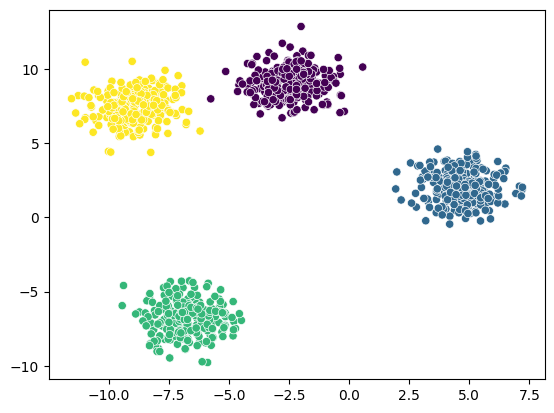

In [12]:
sns.scatterplot(x=X[:,0],y=X[:,1],c=y)

<Axes: >

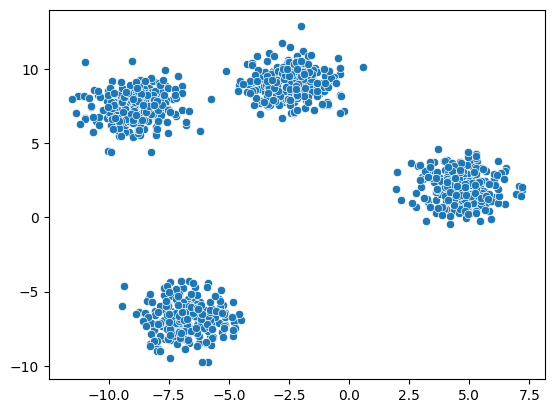

In [13]:
sns.scatterplot(x=X[:,0],y=X[:,1])
# scalling is also iportant befre applying knn

In [14]:
from sklearn.cluster import KMeans

K=4

kmeans=KMeans(n_clusters=K, random_state=42)



In [15]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [18]:
labels=kmeans.fit_predict(X)
labels

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

<Axes: >

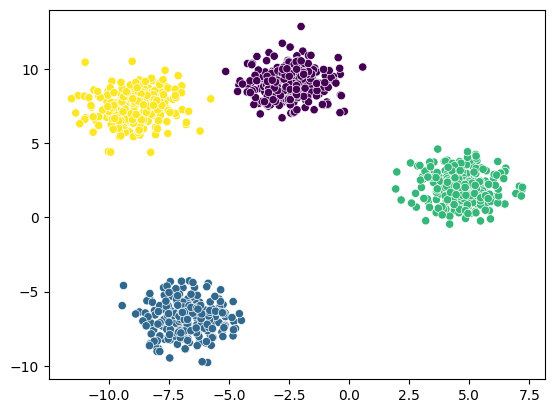

In [20]:
sns.scatterplot(x=X[:,0],y=X[:,1],c=labels)

In [21]:
### how to choose k value
# elbow
#silhouette score


In [26]:
wcss=[]


for k in range(1,21):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit_predict(X)
  wcss.append(kmeans.inertia_)

print(wcss)




[66908.28490516872, 31568.656867381316, 7324.560564741563, 1948.732919385683, 1771.559785603196, 1620.8836922512921, 1505.1910863093303, 1263.3863648961144, 1163.1681204386725, 1071.748074289361, 991.506029519442, 870.0518857699188, 823.3165270123301, 779.2245341692415, 745.6134284441015, 714.8241839452654, 666.5616054899689, 647.3211676226334, 623.7720648898644, 576.0648222148542]


<Axes: >

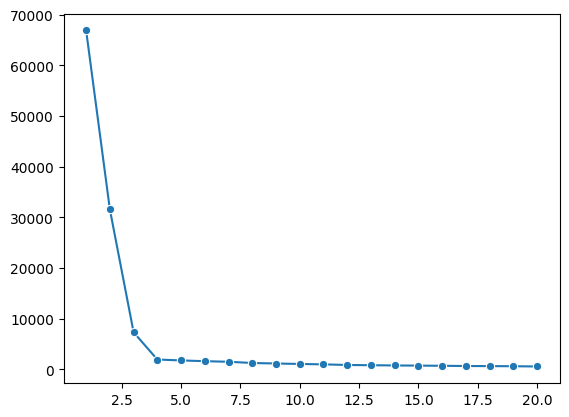

In [30]:
sns.lineplot(x=range(1,21),y=wcss,marker='o')

In [31]:
# autoatic way of k finding k
#kneed module
!pip install kneed

In [32]:
from kneed import KneeLocator
knee = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")
print(knee)

In [33]:
print("optimal K = ", knee.elbow)

optimal K =  4


In [35]:
### Silhouette Score

from sklearn.metrics import silhouette_score
ss = []
# always strt with 2 dont do for 1
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)

    ss.append(score)

    print(score)

0.5895787972208197
0.7521964163365819
0.7915983870089952
0.6755088988942743
0.539644887593934
0.4622068519869839
0.4278709859975668
0.41344054200083263
0.3309248987788468
0.33061114319146623
0.3361844280104858
0.3246374456771648
0.3302085556733592
0.33255489517344927
0.3172423486185819
0.3055598241970686
0.31309826379907085
0.32192604763606303
0.32604587757199577


<Axes: >

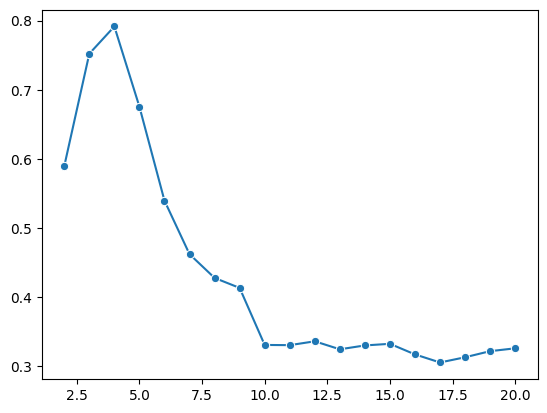

In [36]:
sns.lineplot(x=range(2, 21), y=ss, marker='o')

In [1]:
# K MEANS ON IRIS


In [19]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
iris = load_iris()
print(iris)

print("============================================================================================================================")
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
X.columns=iris.feature_names
# y.columns=['target']
print ("X is ",X)
print("y is ",y)



{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Text(0, 0.5, 'sepal width (cm)')

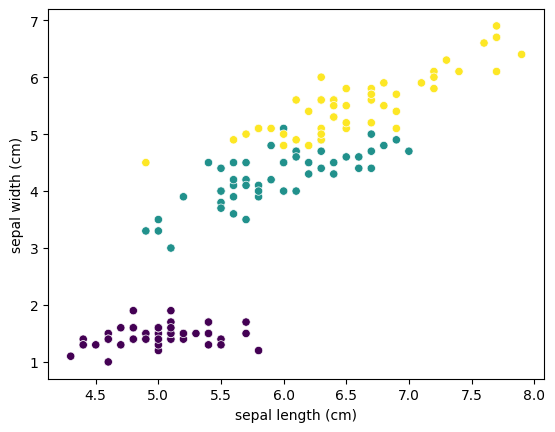

In [34]:
X=iris.data
y=iris.target#numpy


# Visualize
sns.scatterplot(x=X[:,0], y=X[:,2],c=y)#nice sepration

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


<Axes: >

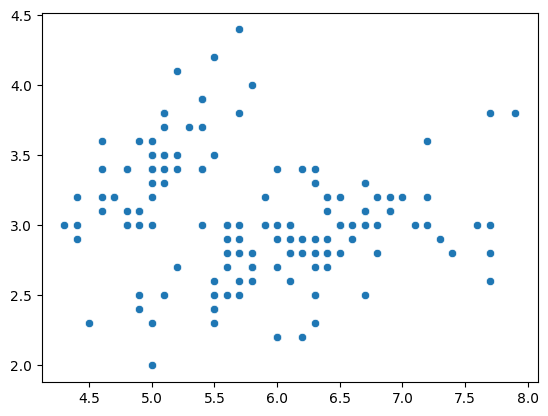

In [26]:
sns.scatterplot(x=X[:,0], y=X[:,1])

In [36]:
#as distance in scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)




[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [43]:
# Elbow method
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

<Axes: >

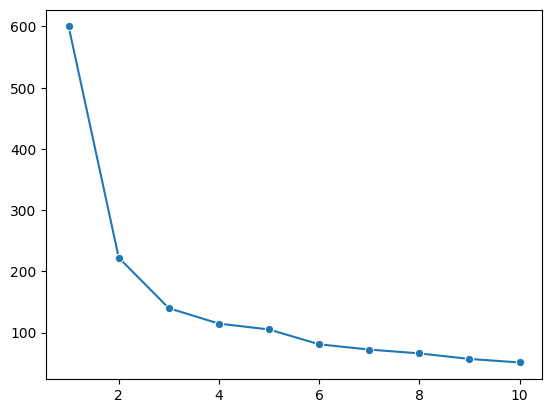

In [44]:
sns.lineplot(x=range(1, 11), y=wcss, marker='o')

In [45]:
# KMeans

kmeans = KMeans(n_clusters=3, random_state=10)
labels = kmeans.fit_predict(X_scaled)
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


<Axes: >

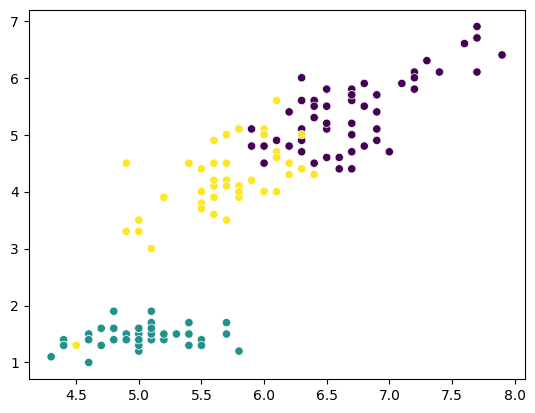

In [47]:
sns.scatterplot(x=X[:, 0], y=X[:,2], c=labels)


<Axes: >

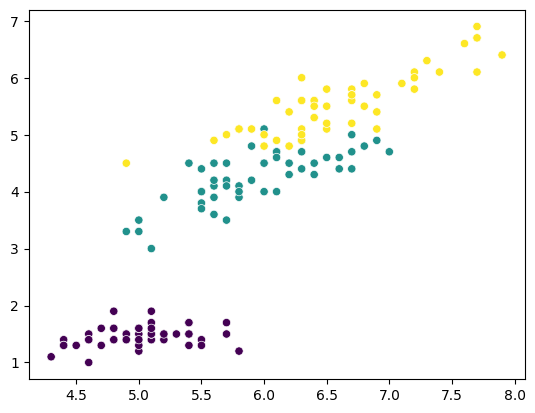

In [48]:
sns.scatterplot(x=X[:, 0], y=X[:,2], c=y)


In [49]:
# optional - dimensionality reduciton using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)#at the end it 2

pca_data = pca.fit_transform(X_scaled)

<Axes: >

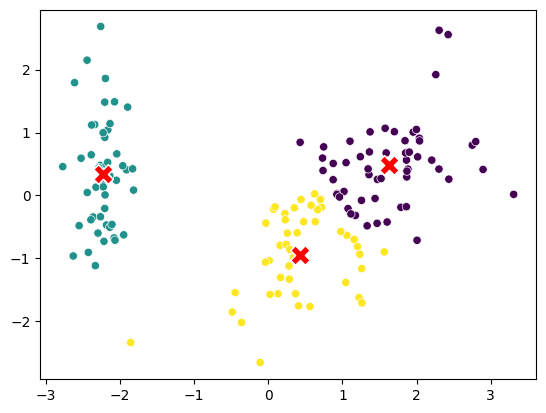

In [57]:
# KMeans

kmeans = KMeans(n_clusters=3, random_state=10)
labels = kmeans.fit_predict(pca_data)

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:,1], c=labels)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="X", c="red", s=200)
# plt.xlabel(pca_data[0])
# plt.ylabel(pca_data[1])